# Controlling the Micro-manager core through Python

This tutorial demonstrates how to control the Micro-Manager core through Pycro-Manager (see red arrows in figure below). 

The core is the lowest level of abstraction in Micro-Manager. It allows direct control of hardware devices (via their Micro-manager device adapters) and is accessible through its API only (i.e. it doesn't have it's own GUI, though higher layers of Micro-Manager add GUI components to control various aspects). Though the core is written in C++, it has Java ("MMCoreJ") and Python ("MMCorePy") bindings compiled against its API. Other languages are also possible in principle, though none are currently supported.

In this tutorial, we'll be indirectly using the Java API to control the core. However, this API will be dynamically translated into Python code by the Pycro-Manager transport layer, so all coding will be done in pure Python


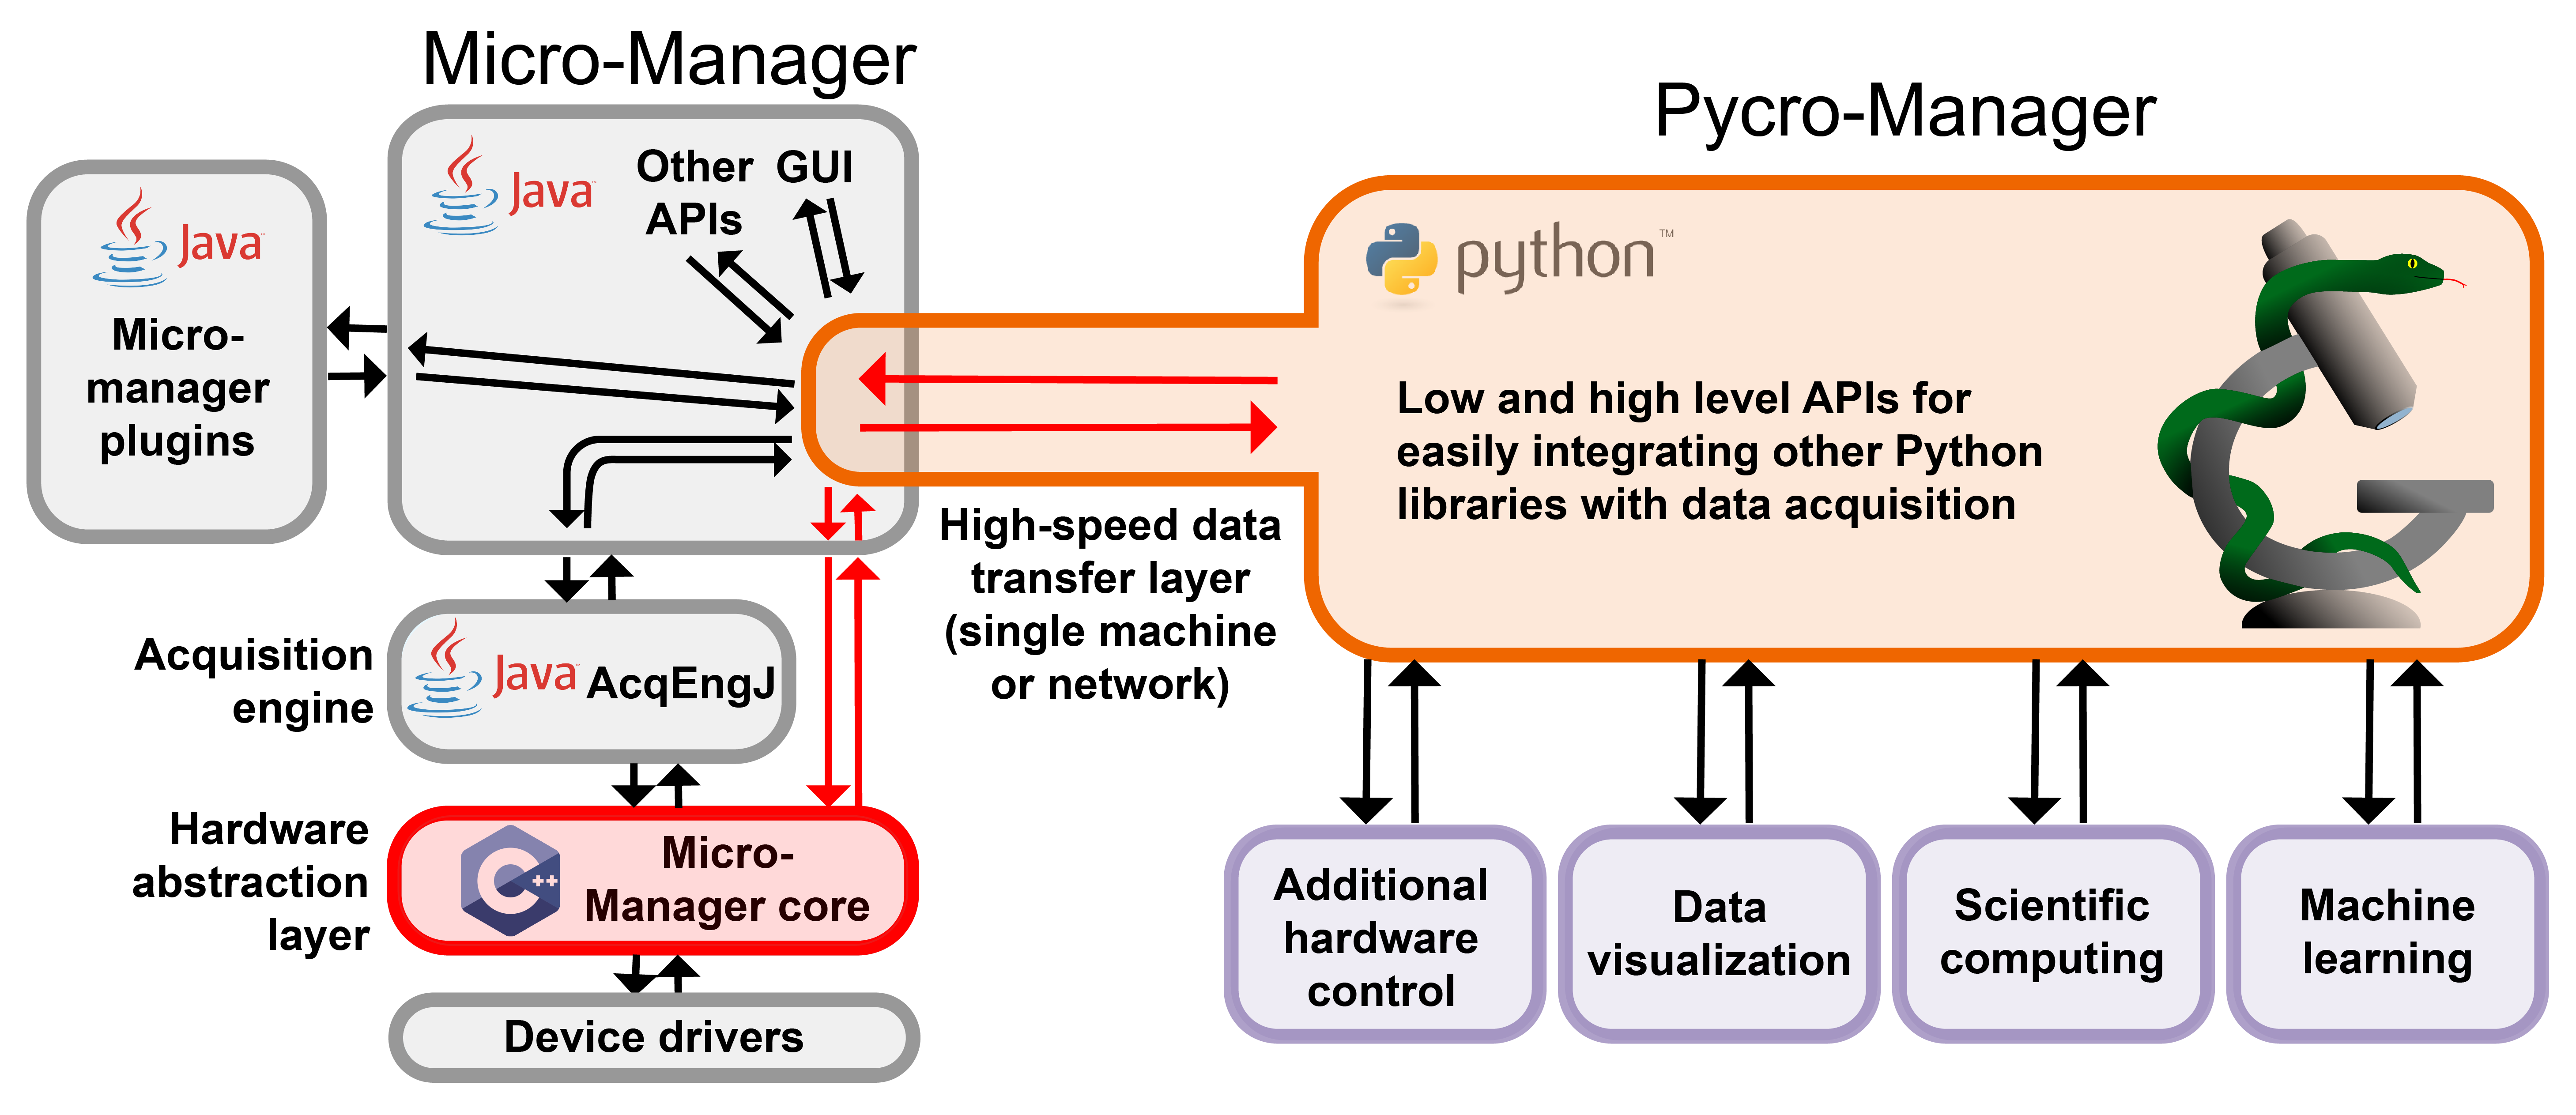

## Setup

0) This tutorial is written for Windows or OSX and assumes you already have a working installation of Python version 3.6 or greater

1) Download and install the latest nighlty build of Micro-Manager 2.0gamma [here](https://micro-manager.org/wiki/Micro-Manager_Nightly_Builds).

2) Open Micro-Manager, select tools-options, and check the box that says Run server on port 4827 (you only need to do this once)

3) Run the code below to install pycromanager

In [2]:
!pip install pycromanager --upgrade

## Documentation

The Micro-Manager wiki has a [Programming Guide](https://micro-manager.org/wiki/Micro-Manager_Programming%20Guide), which contains a lot of useful information. In particular, the 2.0 Core API reference on the siderbar will be helpful in this tutorial. There are two versions of this, which contain the same information, but are built for different language bindings to the core (i.e. C++ or Java). Either one can work for this tutorial since they define the same functions. But one or the other might be easier to read depending on your programming background. The [C++ Core API Reference](https://valelab4.ucsf.edu/~MM/doc/MMCore/html/class_c_m_m_core.html) has the nice feature that the functions are grouped according to their function. The [Java Core API Reference](https://valelab4.ucsf.edu/~MM/doc-2.0.0-gamma/mmcorej/mmcorej/CMMCore.html) may have slightly more readable functions because the argument and return types are more similar to those in Python, making it easier to figure out how to call a particular function. Refering to one (or both) of these will be useful throughout this tutorial. For reference, the Pycro-Manager documentation is [here](https://pycro-manager.readthedocs.io/en/latest/) (though you shouldn't need it to complete this tutorial).

## Startup -- connect to core
First, make sure you've started Micro-Manager

In [3]:
from pycromanager import Bridge

#Create the Micro-Managert to Pycro-Manager transfer layer
bridge = Bridge()
#get object representing micro-manager core
core = bridge.get_core()

Print the name of the Core, which shows that this is a Python object that exposes the Core's API MMCoreJ (i.e. the Java wrapper for the Micro-Manager core)

In [4]:
print(core)

## Snap and display an image

Now we call some functions of the Micro-Manager core. One thing you might be intereseted in doing is snapping an image and displaying it in this notebook. This can be done as follows:

In [5]:
# tell the core to take a single image with the default camera
core.snap_image()

# retrive that image from the core. This will come in the form of a "Tagged image", which 
# is pixels + associated metadata
tagged_image = core.get_tagged_image()

# pixels and metadata are returned as a NumPy ndarray, and a Python dict, respectively.
# print their types here to verify this
print(type(tagged_image.pix))
print(type(tagged_image.tags))

<class 'numpy.ndarray'>
<class 'dict'>


One slightly confusing thing here is that pixels are a 1d array, rather than a 2d as you might expect from an image.
In order to reshape into a 2D, we'll first need to look up in the metadata what the image dimensions are and reshape the array appropriate

In [6]:
image_height = tagged_image.tags['Height']
image_width = tagged_image.tags['Width']

image = tagged_image.pix.reshape((image_height, image_width))

Now plot it

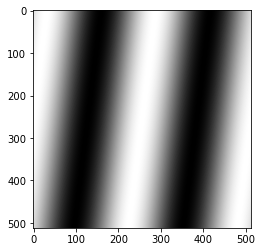

In [7]:
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')
plt.show()

## Exercises
In this section we describe the major features of the core, but leave implementing the code as an exercise. 

Some things that might be helpful throughout this section:

1. The [C++ Core API Reference](https://valelab4.ucsf.edu/~MM/doc/MMCore/html/class_c_m_m_core.html) and [Java Core API Reference](https://valelab4.ucsf.edu/~MM/doc-2.0.0-gamma/mmcorej/mmcorej/CMMCore.html) mentioned earlier. 

2. You may notice that the function names are have changed slightly from the example above to the onces listed here. Specifically, "snapImage" was called as "snap_image". This is because Pycro-Manager automatically converts from the Java convention of "functionsNamesLikeThis()" to the Python convention of "functions_named_like_this()". It is possible to change this behavior when creating the bridge with `Bridge(convert_camel_case=False)`

3. Jupyter notebooks by default have IPython autocomplete, so you can type "core." and press tab and all the available function names will pop up


### Generic microscope control
The core exposes set of functions that enable control of generic microscope parts -- e.g. a camera, a z focus stage, an XY stage. These components can be controlled with a set of functions present in the core API. Below are a set of exercises for exploring the API.

1. Get the camera's current exposure

In [ ]:
### Your code here ###

2. Get the cameras current exposure to a value twice as big

In [ ]:
### Your code here ###

3. Figure out whether autoshutter is currently. If so, turn it off. Then, manually open the shutter, snap an image, and manually close the shutter

In [ ]:
### Your code here ###

4. Figure out what position the XY stage is at, then move it to a position roughly 1000 µm away (be careful you dont smash an objective if youre on a real microscope)

In [ ]:
### Your code here ###

### Device properties
In addition to these generic microscope functions, micro-manger has a generic system for exposing hardware functionality through **Device properties**. In this system, every **Device** has a set of **Properties** which have certain allowed **Values**. For example, an XY stage device might have properties for accelleration and velocity, which accept positive floating point numbers as values. A Camera device might have a property for bit depth, which accepts 8, 10, 12, 14, or 16 as values. Properties can be controlled through the core. Every unique property is identified by the device name and the proprty name

1. Get the names of all currently loaded devices (hint: the function is going to return an object that you need to call a subsequent function on. It might be easier to understand this looking at the Java API)

In [ ]:
### Your code here ###

2. Get the name of the camera device, and then figure the names of all its properties

In [ ]:
### Your code here ###

3. Pick an interesting property, get its current value, then set a new value

In [ ]:
### Your code here ###

### Config groups
In order to avoid having to control each property individually, **Config groups** allow you to group multiple properties together, and define **Presets**, which have a single value for each property in the group. Usually, you will save these groups to a Micro-Manager configuration file, so that they will be automatically present when restarting the application. Sine you're using the demo configuration here, there are already config groups defined.

1. Figure out the names of all exisiting config groups

In [ ]:
### Your code here ###

2. Pick a config group and find the names of all its preset values

In [ ]:
### Your code here ###

3. Change the config group to a different preset value

In [ ]:
### Your code here ###